## 1. Problem Representation

- Design a data structure to represent the places and distances between them. This could be an adjacency matrix or a list of city objects with distance attributes.
- Implement a function to calculate the total distance of a given route (visiting order) for all the places.

Here's an example of a distance matrix representing distances between five places (Dorado Park, Khomasdal, Katutura, Eros, Klein Windhoek) measured in Kilometres:

| Places | Dorado Park | Khomasdal | Katutura | Eros | Klein Windhoek |
| ------ | -----------:| ---------:| --------:| ----:| --------------:|
|Dorado Park | 0 | 7 | 20 | 15 | 12 |
|Khomasdal | 10|  0|  6 | 14 | 18 |
|Katutura | 20 | 6 | 0 | 15 | 30 |
|Eros | 15 | 14 | 25 | 0 | 2 |
|Klein Windhoek | 12 | 18 | 30|  2 | 0 |

In [16]:
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from matplotlib.animation import FuncAnimation

class City:
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y

windhoek_west = City("Windhoek West", 0, 0)
eros = City("Eros", 1, 2)
havana = City("Havana", 3, 1)
otjomuise = City("Otjomuise", 2, 3)

cities = [windhoek_west, eros, havana, otjomuise]

# Calculate total distance of a given route
def calculate_total_distance(route):
    total_distance = 0.0
    for i in range(len(route) - 1):
        city = route[i]
        next_city = route[i + 1]
        total_distance += distance.euclidean((city.x, city.y), (next_city.x, next_city.y))
    return total_distance 


## 2. Hill Climbing Algorithm

- Implement the hill climbing algorithm for the TSP.
- Define a function that generates a random initial route visiting all places.
- Define a function to explore neighbouring solutions. This might involve swapping the order of two randomly chosen places in the current route.
- Implement the core logic of hill climbing: evaluate neighbouring routes, move to a better route if found, and repeat until reaching a local optimum (no improving neighbours).

In [17]:
def generate_initial_route(places):
    route = places[:]
    random.shuffle(route)
    return route

def get_neighbour(route):
    i, j = random.sample(range(len(route)), 2)
    new_route = route[:]
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route


def hill_climbing(places, max_iterations):
    current_route = generate_initial_route(places)
    current_distance = calculate_total_distance(current_route)

    for _ in range(max_iterations):
        neighbour = get_neighbour(current_route)
        neighbour_distance = calculate_total_distance(neighbour)

        if neighbour_distance < current_distance:
            current_route = neighbour
            current_distance = neighbour_distance
        else:
            break

    return current_route, current_distance

max_iterations = 1000
num_routes = 5

best_routes = []
best_distances = []

for _ in range(num_routes):
    best_route, best_distance = hill_climbing(cities, max_iterations)
    best_routes.append(best_route)
    best_distances.append(best_distance)

## 3. Analysis and Comparison

- Analyse the time complexity of your hill climbing implementation.
- Run your hill climbing algorithm on various test cases with different numbers of places.
- Compare the total distance found by your algorithm with the optimal distance. You can calculate the optimal solution exhaustively for a small number of cities or use an existing optimal TSP solver for larger datasets (libraries or online tools).
- Analyse the impact of the number of iterations (number of times you explore neighbours) on the quality of the solution found by hill climbing (distance compared to optimal).

In [20]:
#Find the optimal distance and  Best distance
optimal_distance = calculate_total_distance(cities)
print("Optimal distance:", optimal_distance)
for i in range(num_routes):
    print("Best distance found in route", i+1, ":", best_distances[i])

Optimal distance: 6.708203932499369
Best distance found in route 1 : 6.812559200041264
Best distance found in route 2 : 8.07768723046357
Best distance found in route 3 : 5.8863495173726745
Best distance found in route 4 : 7.255832815336873
Best distance found in route 5 : 5.8863495173726745


## 4. Visualisation

- Develop a visualisation tool (text-based or graphical) to display a sample city set and the routes generated by your hill climbing algorithm (initial, intermediate, and final).
- Reflect on potential improvements or alternative algorithms for finding better solutions to the TSP. (Explain this during your presentation)

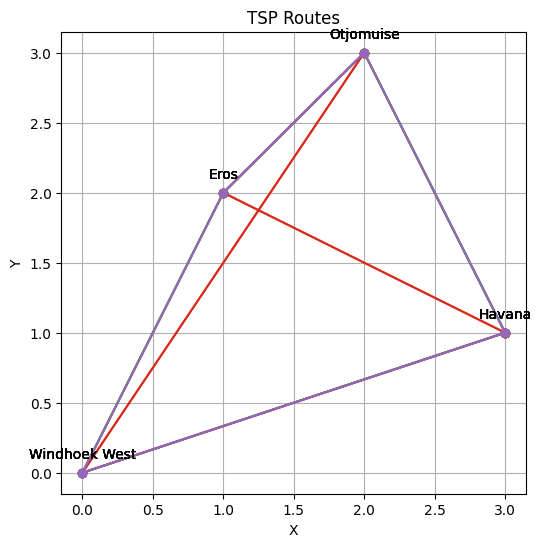

In [21]:
def plot_routes(routes):
    plt.figure(figsize=(6, 6))
    for i, route in enumerate(routes):
        x = [city.x for city in route] + [route[0].x]
        y = [city.y for city in route] + [route[0].y]
        plt.plot(x, y, 'o-')
        for city in route:
            plt.annotate(city.name, (city.x, city.y), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title("TSP Routes")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

plot_routes(best_routes)